### (a) Download Data

Package imports

In [ ]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

Get the Vertebral Column Data Set

In [ ]:
dummy = pd.read_fwf('../data/vertebral_column_data/column_2c.dat', names=['vals'])

In [ ]:
df = dummy['vals'].str.split(' ', expand=True)

In [ ]:
df=df.rename(columns={0:'PI', 1:'PT', 2:'LLA', 3:'SS', 4:'PR', 5:'GOS',6:'class'})

In [ ]:
df['class'].unique()

array(['AB', 'A', 'NO'], dtype=object)

In [ ]:
df[df['class']=='A']

,PI,PT,LLA,SS,PR,GOS,class
197,58.83,37.58,125.74,21.25,135.63,117.31,A


In [ ]:
df = df.drop(197)

In [ ]:
df['class'].unique()

array(['AB', 'NO'], dtype=object)

In [ ]:
df['class']=df['class'].replace({'AB':1,'NO':0})

In [ ]:
df['PI']=df['PI'].astype(str).astype(float)
df['PT']=df['PT'].astype(str).astype(float)
df['LLA']=df['LLA'].astype(str).astype(float)
df['SS']=df['SS'].astype(str).astype(float)
df['PR']=df['PR'].astype(str).astype(float)
df['GOS']=df['GOS'].astype(str).astype(float)

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

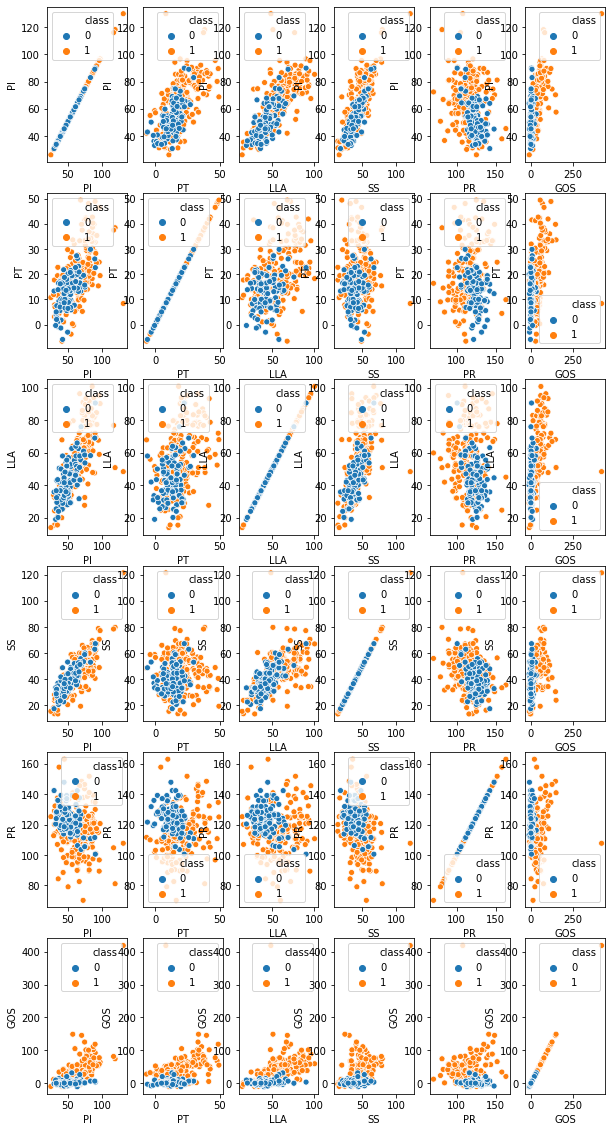

In [ ]:
fig, ax = plt.subplots(6,6,figsize=(10,20))
i=0
for y,row in enumerate(df.columns[:-1]):
    for x,col in enumerate(df.columns[:-1]):
        seaborn.scatterplot(data=df, x=row, y=col, ax=ax[x][y], hue='class')
plt.show()

#### ii. Boxplots

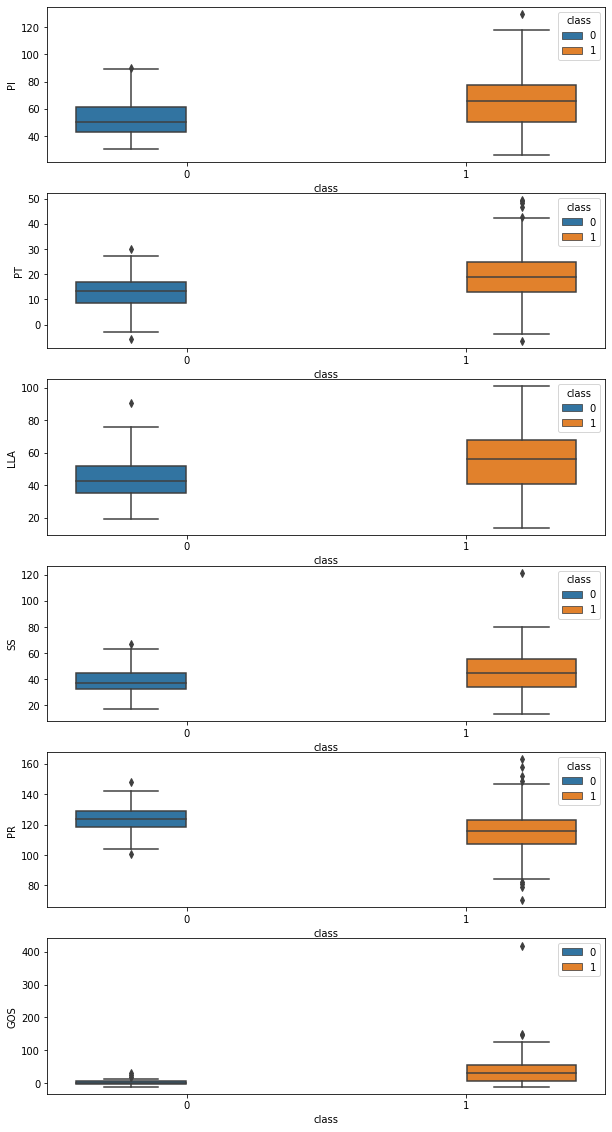

In [ ]:
fig, ax = plt.subplots(6,1,figsize=(10,20))
i=0
for col in df.columns[:-1]:
    seaborn.boxplot(data=df, y=col, x='class', ax=ax[i], hue='class')
    i+=1
plt.legend(loc="upper right")
plt.show()

#### iii. Split Data Set

In [ ]:
t1= df[df['class']==0][:70]
t1

,PI,PT,LLA,SS,PR,GOS,class
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
275,67.29,16.72,51.00,50.57,137.59,4.96,0
276,51.33,13.63,33.26,37.69,131.31,1.79,0
277,65.76,13.21,44.00,52.55,129.39,-1.98,0
278,40.41,-1.33,30.98,41.74,119.34,-6.17,0


In [ ]:
t2= df[df['class']==1][:140]
t2

,PI,PT,LLA,SS,PR,GOS,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


In [ ]:
train = pd.concat([t1,t2], ignore_index=True)
train

,PI,PT,LLA,SS,PR,GOS,class
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09,1
206,88.02,39.84,81.77,48.18,116.60,56.77,1
207,83.40,34.31,78.42,49.09,110.47,49.67,1
208,72.05,24.70,79.87,47.35,107.17,56.43,1


In [ ]:
te1= df[df['class']==0][70:]
te1

,PI,PT,LLA,SS,PR,GOS,class
280,50.09,13.43,34.46,36.66,119.13,3.09,0
281,64.26,14.50,43.90,49.76,115.39,5.95,0
282,53.68,13.45,41.58,40.24,113.91,2.74,0
283,49.00,13.11,51.87,35.88,126.40,0.54,0
284,59.17,14.56,43.20,44.60,121.04,2.83,0
285,67.80,16.55,43.26,51.25,119.69,4.87,0
286,61.73,17.11,46.90,44.62,120.92,3.09,0
287,33.04,-0.32,19.07,33.37,120.39,9.35,0
288,74.57,15.72,58.62,58.84,105.42,0.60,0
289,44.43,14.17,32.24,30.26,131.72,-3.60,0


In [ ]:
te2 = df[df['class']==1][140:]
te2

,PI,PT,LLA,SS,PR,GOS,class
140,69.56,15.40,74.44,54.16,105.07,29.70,1
141,89.50,48.90,72.00,40.60,134.63,118.35,1
142,85.29,18.28,100.74,67.01,110.66,58.88,1
143,60.63,20.60,64.54,40.03,117.23,104.86,1
144,60.04,14.31,58.04,45.73,105.13,30.41,1
...,...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29,1
206,95.48,46.55,59.00,48.93,96.68,77.28,1
207,74.09,18.82,76.03,55.27,128.41,73.39,1
208,87.68,20.37,93.82,67.31,120.94,76.73,1


In [ ]:
test = pd.concat([te1,te2],ignore_index=True)
test

,PI,PT,LLA,SS,PR,GOS,class
0,50.09,13.43,34.46,36.66,119.13,3.09,0
1,64.26,14.50,43.90,49.76,115.39,5.95,0
2,53.68,13.45,41.58,40.24,113.91,2.74,0
3,49.00,13.11,51.87,35.88,126.40,0.54,0
4,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
94,80.11,33.94,85.10,46.17,125.59,100.29,1
95,95.48,46.55,59.00,48.93,96.68,77.28,1
96,74.09,18.82,76.03,55.27,128.41,73.39,1
97,87.68,20.37,93.82,67.31,120.94,76.73,1


### (c) Classification

#### i. Euclidean Metric

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
import numpy as np
import math

In [ ]:
def predictions_k_neigh(k, data):
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(train.iloc[:,:-1], train.iloc[:,-1:].values.ravel())
    return clf.predict(data)

In [ ]:
errors = pd.DataFrame({'error':[],'type':[],'k_neigh':[]})
for i in range(208,-1,-3):
    train_error = 1-accuracy_score(train.iloc[:,-1:], predictions_k_neigh(i, train.iloc[:,:-1]))
    test_error = 1-accuracy_score(test.iloc[:,-1:], predictions_k_neigh(i, test.iloc[:,:-1]))
    k_neigh = int(i)
    errors=pd.concat([errors, pd.DataFrame({'error':[train_error],'type':['train'],'k_neigh':[k_neigh]})], ignore_index=True)
    errors=pd.concat([errors, pd.DataFrame({'error':[test_error],'type':['test'],'k_neigh':[k_neigh]})], ignore_index=True)
errors

,error,type,k_neigh
0,0.333333,train,208.0
1,0.303030,test,208.0
2,0.333333,train,205.0
3,0.303030,test,205.0
4,0.333333,train,202.0
...,...,...,...
135,0.121212,test,7.0
136,0.142857,train,4.0
137,0.060606,test,4.0
138,0.000000,train,1.0


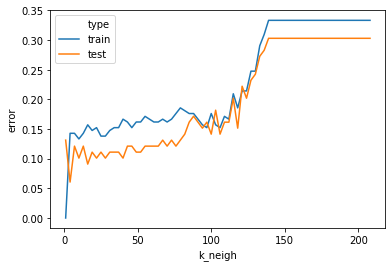

In [ ]:
seaborn.lineplot(data=errors, y='error', x='k_neigh', hue='type')

In [ ]:
errors[errors['error']==errors[errors['type']=='test']['error'].min()].min()

error      0.0606061
type            test
k_neigh            4
dtype: object

In [ ]:
predictions_4_neigh = predictions_k_neigh(4, test.iloc[:,:-1])
predictions_4_neigh

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
conf_matrix = confusion_matrix(test.iloc[:,-1:],predictions_4_neigh)
conf_matrix

array([[25,  5],
       [ 1, 68]])

In [ ]:
print(classification_report(test.iloc[:,-1:],predictions_4_neigh))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        69

    accuracy                           0.94        99
   macro avg       0.95      0.91      0.93        99
weighted avg       0.94      0.94      0.94        99



In [ ]:
best_test_error = pd.DataFrame({'test_error':[],'best_k':[],'N':[]})
for N in range(10,220,10):
    min_error = float('inf')
    cur_n = N//3
    cur_best_k = 0
    cur_train = pd.concat([train[train['class']==0][:cur_n], df[df['class']==1][:(N-cur_n)]], ignore_index=True)
    for k in range(1,N,5):
        clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        clf.fit(cur_train.iloc[:,:-1], cur_train.iloc[:,-1:].values.ravel())
        error = 1-accuracy_score(test.iloc[:,-1:], clf.predict(test.iloc[:,:-1]))
        #print(error)
        if min_error>error:
            min_error=error
            cur_best_k = k
    best_test_error=pd.concat([best_test_error, pd.DataFrame({'test_error':[min_error],'best_k':[cur_best_k],'N':[N]})], ignore_index=True)

best_test_error

,test_error,best_k,N
0,0.242424,1.0,10.0
1,0.191919,6.0,20.0
2,0.222222,1.0,30.0
3,0.252525,11.0,40.0
4,0.303030,16.0,50.0
5,0.282828,21.0,60.0
6,0.292929,26.0,70.0
7,0.292929,26.0,80.0
8,0.292929,41.0,90.0
9,0.252525,6.0,100.0


### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [ ]:
def predictions_k_neigh(k, data, cur_p):
    clf = KNeighborsClassifier(n_neighbors=k, p=cur_p)
    clf.fit(train.iloc[:,:-1], train.iloc[:,-1:].values.ravel())
    return clf.predict(data)

In [ ]:
errors = pd.DataFrame({'error':[],'type':[],'k_neigh':[]})
for i in range(196,-4,-5):
    train_error = 1-accuracy_score(train.iloc[:,-1:], predictions_k_neigh(i, train.iloc[:,:-1], 1))
    test_error = 1-accuracy_score(test.iloc[:,-1:], predictions_k_neigh(i, test.iloc[:,:-1], 1))
    k_neigh = int(i)
    errors=pd.concat([errors, pd.DataFrame({'error':[train_error],'type':['train'],'k_neigh':[k_neigh]})], ignore_index=True)
    errors=pd.concat([errors, pd.DataFrame({'error':[test_error],'type':['test'],'k_neigh':[k_neigh]})], ignore_index=True)
errors

,error,type,k_neigh
0,0.333333,train,196.0
1,0.303030,test,196.0
2,0.333333,train,191.0
3,0.303030,test,191.0
4,0.333333,train,186.0
...,...,...,...
75,0.111111,test,11.0
76,0.138095,train,6.0
77,0.111111,test,6.0
78,0.000000,train,1.0


In [ ]:
errors[errors['error']==errors[errors['type']=='test']['error'].min()].min()

error      0.111111
type           test
k_neigh           6
dtype: object

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [ ]:
def predictions_k_neigh(k, data, log_p):
    clf = KNeighborsClassifier(n_neighbors=k, p=10**(log_p))
    clf.fit(train.iloc[:,:-1], train.iloc[:,-1:].values.ravel())
    return clf.predict(data)

In [ ]:
errors = pd.DataFrame({'error':[],'type':[],'log p':[]})
p=0.1
while p<=1:
    k = 6
    train_error = 1-accuracy_score(train.iloc[:,-1:], predictions_k_neigh(k, train.iloc[:,:-1], p))
    test_error = 1-accuracy_score(test.iloc[:,-1:], predictions_k_neigh(k, test.iloc[:,:-1], p))
    k_neigh = int(i)
    errors=pd.concat([errors, pd.DataFrame({'error':[train_error],'type':['train'],'log p':[p]})], ignore_index=True)
    errors=pd.concat([errors, pd.DataFrame({'error':[test_error],'type':['test'],'log p':[p]})], ignore_index=True)
    p+=0.1
errors

,error,type,log p
0,0.138095,train,0.1
1,0.090909,test,0.1
2,0.147619,train,0.2
3,0.090909,test,0.2
4,0.152381,train,0.3
5,0.080808,test,0.3
6,0.152381,train,0.4
7,0.080808,test,0.4
8,0.147619,train,0.5
9,0.080808,test,0.5


In [ ]:
errors[errors['error']==errors[errors['type']=='test']['error'].min()].min()

error    0.0606061
type          test
log p          0.6
dtype: object

##### C. Chebyshev Distance With p -> infinity.

In [ ]:
def predictions_k_neigh(k, data):
    clf = KNeighborsClassifier(n_neighbors=k,metric='chebyshev')
    clf.fit(train.iloc[:,:-1], train.iloc[:,-1:].values.ravel())
    return clf.predict(data)

In [ ]:
errors = pd.DataFrame({'error':[],'type':[],'k_neigh':[]})
for i in range(196,-4,-5):
    train_error = 1-accuracy_score(train.iloc[:,-1:], predictions_k_neigh(i, train.iloc[:,:-1]))
    test_error = 1-accuracy_score(test.iloc[:,-1:], predictions_k_neigh(i, test.iloc[:,:-1]))
    k_neigh = int(i)
    errors=pd.concat([errors, pd.DataFrame({'error':[train_error],'type':['train'],'k_neigh':[k_neigh]})], ignore_index=True)
    errors=pd.concat([errors, pd.DataFrame({'error':[test_error],'type':['test'],'k_neigh':[k_neigh]})], ignore_index=True)
errors

,error,type,k_neigh
0,0.333333,train,196.0
1,0.303030,test,196.0
2,0.333333,train,191.0
3,0.303030,test,191.0
4,0.333333,train,186.0
...,...,...,...
75,0.121212,test,11.0
76,0.152381,train,6.0
77,0.101010,test,6.0
78,0.000000,train,1.0


In [ ]:
errors[errors['error']==errors[errors['type']=='test']['error'].min()].min()

error      0.0808081
type            test
k_neigh           16
dtype: object

#### ii. Mahalanobis Distance.

In [ ]:
def predictions_k_neigh(k, data):
    clf = KNeighborsClassifier(n_neighbors=k,metric='mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(train.iloc[:,:-1].T))})
    clf.fit(train.iloc[:,:-1], train.iloc[:,-1:].values.ravel())
    return clf.predict(data)

In [ ]:
errors = pd.DataFrame({'error':[],'type':[],'k_neigh':[]})
for i in range(196,-4,-5):
    train_error = 1-accuracy_score(train.iloc[:,-1:], predictions_k_neigh(i, train.iloc[:,:-1]))
    test_error = 1-accuracy_score(test.iloc[:,-1:], predictions_k_neigh(i, test.iloc[:,:-1]))
    k_neigh = int(i)
    errors=pd.concat([errors, pd.DataFrame({'error':[train_error],'type':['train'],'k_neigh':[k_neigh]})], ignore_index=True)
    errors=pd.concat([errors, pd.DataFrame({'error':[test_error],'type':['test'],'k_neigh':[k_neigh]})], ignore_index=True)
errors

,error,type,k_neigh
0,0.333333,train,196.0
1,0.303030,test,196.0
2,0.333333,train,191.0
3,0.303030,test,191.0
4,0.333333,train,186.0
...,...,...,...
75,0.202020,test,11.0
76,0.119048,train,6.0
77,0.171717,test,6.0
78,0.000000,train,1.0


In [ ]:
errors[errors['error']==errors[errors['type']=='test']['error'].min()]

,error,type,k_neigh
77,0.171717,test,6.0
79,0.171717,test,1.0


Best k is 6, as it gives least error. k=1 also gives least error but is not suitable as can cause overfitting.

### (e) Weighted Decision


Eculidean

In [ ]:
def predictions_k_neigh(k, data):
    clf = KNeighborsClassifier(n_neighbors=k,metric='euclidean', weights='distance')
    clf.fit(train.iloc[:,:-1], train.iloc[:,-1:].values.ravel())
    return clf.predict(data)

In [ ]:
errors = pd.DataFrame({'error':[],'type':[],'k_neigh':[]})
for i in range(196,-4,-5):
    #train_error = 1-accuracy_score(train.iloc[:,-1:], predictions_k_neigh(i, train.iloc[:,:-1]))
    test_error = 1-accuracy_score(test.iloc[:,-1:], predictions_k_neigh(i, test.iloc[:,:-1]))
    k_neigh = int(i)
    #errors=pd.concat([errors, pd.DataFrame({'error':[train_error],'type':['train'],'k_neigh':[k_neigh]})], ignore_index=True)
    errors=pd.concat([errors, pd.DataFrame({'error':[test_error],'type':['test'],'k_neigh':[k_neigh]})], ignore_index=True)
errors


,error,type,k_neigh
0,0.282828,test,196.0
1,0.282828,test,191.0
2,0.272727,test,186.0
3,0.272727,test,181.0
4,0.272727,test,176.0
5,0.272727,test,171.0
6,0.252525,test,166.0
7,0.232323,test,161.0
8,0.202020,test,156.0
9,0.191919,test,151.0


In [ ]:
errors[errors['error']==errors[errors['type']=='test']['error'].min()].min()

error      0.10101
type          test
k_neigh          6
dtype: object

Manhattan

In [ ]:
def predictions_k_neigh(k, data):
    clf = KNeighborsClassifier(n_neighbors=k,metric='euclidean', weights='distance')
    clf.fit(train.iloc[:,:-1], train.iloc[:,-1:].values.ravel())
    return clf.predict(data)

In [ ]:
errors = pd.DataFrame({'error':[],'type':[],'k_neigh':[]})
for i in range(196,-4,-5):
    #train_error = 1-accuracy_score(train.iloc[:,-1:], predictions_k_neigh(i, train.iloc[:,:-1]))
    test_error = 1-accuracy_score(test.iloc[:,-1:], predictions_k_neigh(i, test.iloc[:,:-1]))
    k_neigh = int(i)
    #errors=pd.concat([errors, pd.DataFrame({'error':[train_error],'type':['train'],'k_neigh':[k_neigh]})], ignore_index=True)
    errors=pd.concat([errors, pd.DataFrame({'error':[test_error],'type':['test'],'k_neigh':[k_neigh]})], ignore_index=True)
errors

,error,type,k_neigh
0,0.282828,test,196.0
1,0.282828,test,191.0
2,0.272727,test,186.0
3,0.272727,test,181.0
4,0.272727,test,176.0
5,0.272727,test,171.0
6,0.252525,test,166.0
7,0.232323,test,161.0
8,0.202020,test,156.0
9,0.191919,test,151.0


In [ ]:
errors[errors['error']==errors[errors['type']=='test']['error'].min()].min()

error      0.10101
type          test
k_neigh          6
dtype: object

Chebyshev

In [ ]:
def predictions_k_neigh(k, data):
    clf = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights='distance')
    clf.fit(train.iloc[:,:-1], train.iloc[:,-1:].values.ravel())
    return clf.predict(data)

In [ ]:
errors = pd.DataFrame({'error':[],'type':[],'k_neigh':[]})
for i in range(196,-4,-5):
    #train_error = 1-accuracy_score(train.iloc[:,-1:], predictions_k_neigh(i, train.iloc[:,:-1]))
    test_error = 1-accuracy_score(test.iloc[:,-1:], predictions_k_neigh(i, test.iloc[:,:-1]))
    k_neigh = int(i)
    #errors=pd.concat([errors, pd.DataFrame({'error':[train_error],'type':['train'],'k_neigh':[k_neigh]})], ignore_index=True)
    errors=pd.concat([errors, pd.DataFrame({'error':[test_error],'type':['test'],'k_neigh':[k_neigh]})], ignore_index=True)
errors

,error,type,k_neigh
0,0.282828,test,196.0
1,0.272727,test,191.0
2,0.272727,test,186.0
3,0.272727,test,181.0
4,0.262626,test,176.0
5,0.262626,test,171.0
6,0.262626,test,166.0
7,0.232323,test,161.0
8,0.212121,test,156.0
9,0.212121,test,151.0


In [ ]:
errors[errors['error']==errors[errors['type']=='test']['error'].min()].min()

error      0.111111
type           test
k_neigh          16
dtype: object

### (f) Training Error Rate

Lowest training error: 0